In [1]:
import tensorflow
tensorflow.__version__

'2.3.1'

In [2]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]

train_path = 'Train/'
test_path = 'Test/'

In [4]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 3406 images belonging to 8 classes.
Found 465 images belonging to 8 classes.


# **ResNet50**

In [6]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in resnet.layers:
  layer.trainable = False

In [8]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(8, activation='softmax')(x)

In [9]:
model = Model(inputs = resnet.inputs, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=1, validation_steps=1,callbacks=[callback])

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
1/1 [==============================] - 15s 15s/step - loss: 2.3580 - accuracy: 0.1562 - val_loss: 2.3270 - val_accuracy: 0.0938
Epoch 2/20
1/1 [==============================] - 6s 6s/step - loss: 2.0310 - accuracy: 0.1562 - val_loss: 2.3797 - val_accuracy: 0.1875
Epoch 3/20
1/1 [==============================] - 5s 5s/step - loss: 2.5745 - accuracy: 0.0000e+00 - val_loss: 2.4012 - val_accuracy: 0.1250
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 2.3229 - accuracy: 0.0938 - val_loss: 2.2453 - val_accuracy: 0.1875
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 2.5074 - accuracy: 0.1562 - val_loss: 2.1623 - val_accuracy: 0.1875


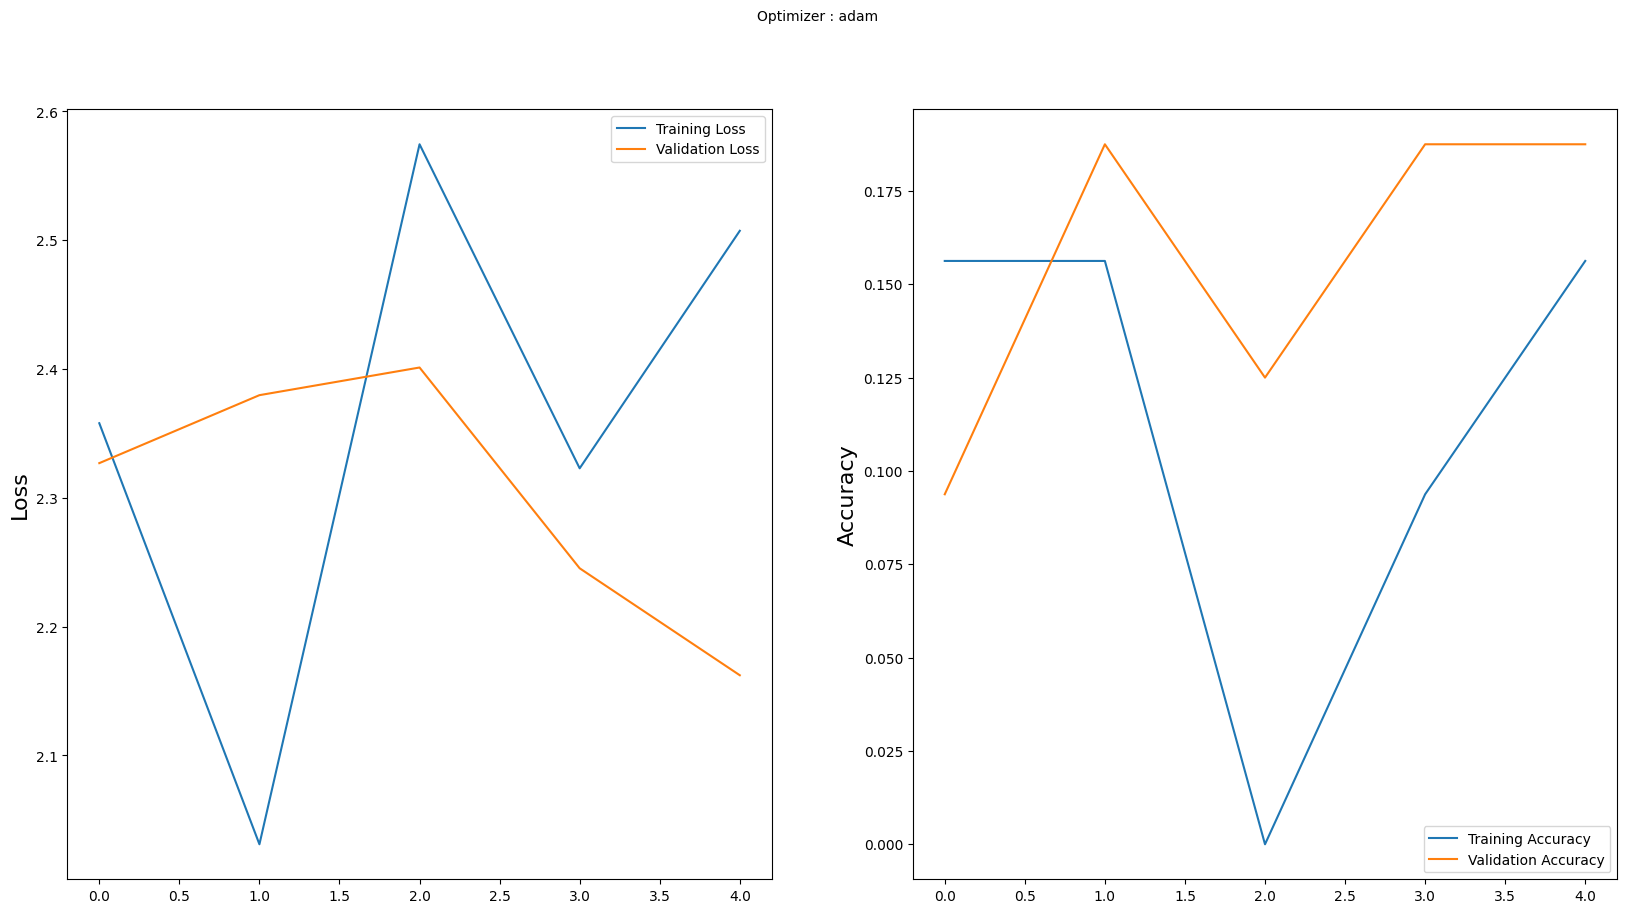

In [12]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **InceptionV3**

In [13]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

In [14]:
predictions = Dense(8, activation='softmax')(x2)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                         

In [15]:
for layer in base_model.layers:
    layer.trainable = False


In [16]:
models.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set, validation_data=train_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(train_set),callbacks=[callback])

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
15/15 [==============================] - 36s 2s/step - loss: 2.4077 - accuracy: 0.2688 - val_loss: 1.5902 - val_accuracy: 0.4710
Epoch 2/20
15/15 [==============================] - 27s 2s/step - loss: 1.4010 - accuracy: 0.5269 - val_loss: 1.2443 - val_accuracy: 0.5892
Epoch 3/20
15/15 [==============================] - 28s 2s/step - loss: 1.0976 - accuracy: 0.6172 - val_loss: 0.9873 - val_accuracy: 0.6366
Epoch 4/20
15/15 [==============================] - 28s 2s/step - loss: 0.8953 - accuracy: 0.6839 - val_loss: 0.8061 - val_accuracy: 0.7269
Epoch 5/20
15/15 [==============================] - 27s 2s/step - loss: 0.7959 - accuracy: 0.7419 - val_loss: 0.6943 - val_accuracy: 0.7656
Epoch 6/20
15/15 [==============================] - 28s 2s/step - loss: 0.6787 - accuracy: 0.7720 - val_loss: 0.6651 - val_accuracy: 0.7892
Epoch 7/20
15/15 [==============================] - 27s 2s/step - loss: 0.6718 - accuracy: 0.8043 - val_loss: 0.5395 - val_accuracy: 0.8409
Epoch 8/20
15/15 [==

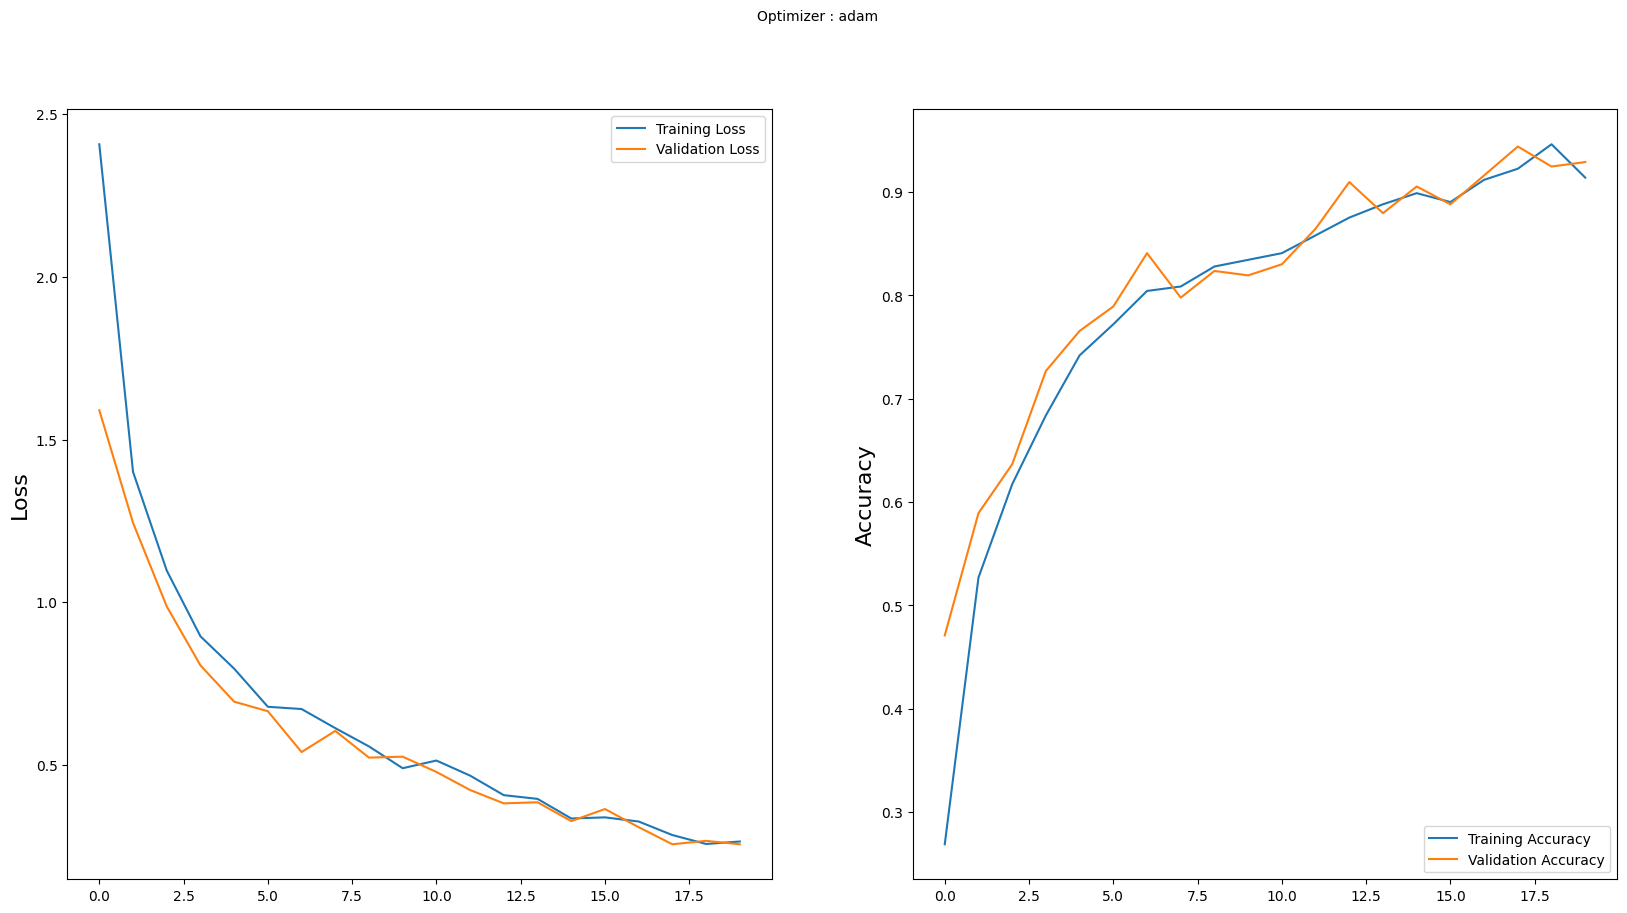

In [17]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNet**

In [32]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [33]:
x1= Flatten()(mob.output)
prediction1 = Dense(8, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

In [ ]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
15/15 [==============================] - 46s 3s/step - loss: 3.7659 - accuracy: 0.4538 - val_loss: 9.6177 - val_accuracy: 0.2473
Epoch 2/20
15/15 [==============================] - 42s 3s/step - loss: 1.2845 - accuracy: 0.7957 - val_loss: 7.8920 - val_accuracy: 0.3097
Epoch 3/20
15/15 [==============================] - 41s 3s/step - loss: 0.7861 - accuracy: 0.8731 - val_loss: 9.3876 - val_accuracy: 0.3226
Epoch 4/20
15/15 [==============================] - 67s 5s/step - loss: 0.7618 - accuracy: 0.8774 - val_loss: 6.4029 - val_accuracy: 0.4194
Epoch 5/20
 8/15 [===============>..............] - ETA: 14s - loss: 0.3377 - accuracy: 0.9502

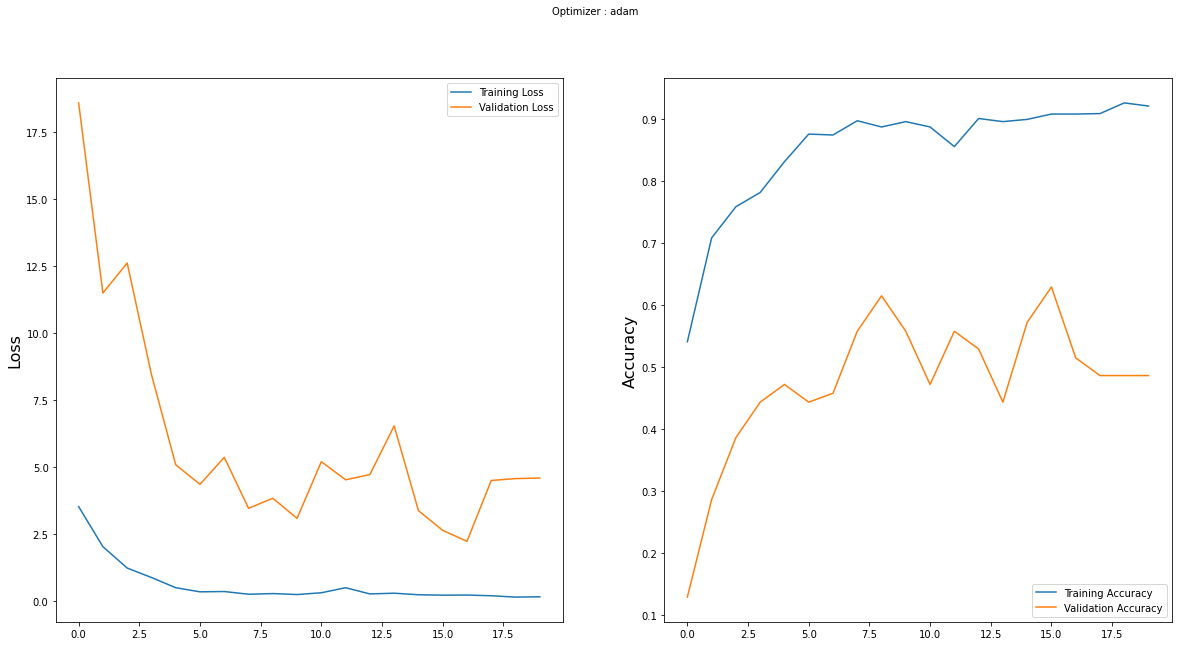

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, ResNet50V2,ResNet101V2,ResNet152V2

In [ ]:
des121=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(des121.output)
prediction1 = Dense(8, activation='softmax')(x1)
model1 = Model(inputs = des121.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/20
44/44 [==============================] - 316s 7s/step - loss: 2.5667 - accuracy: 0.5481 - val_loss: 42.8536 - val_accuracy: 0.2429
Epoch 2/20
44/44 [==============================] - 318s 7s/step - loss: 1.6803 - accuracy: 0.6566 - val_loss: 6.2740 - val_accuracy: 0.2857
Epoch 3/20
44/44 [==============================] - 318s 7s/step - loss: 2.5704 - accuracy: 0.6422 - val_loss: 284.0741 - val_accuracy: 0.1429
Epoch 4/20
44/44 [==============================] - 319s 7s/step - loss: 2.8752 - accuracy: 0.5453 - val_loss: 78627.7734 - val_accuracy: 0.2286
Epoch 5/20
44/44 [==============================] - 319s 7s/step - loss: 1.8857 - accuracy: 0.5280 - val_loss: 3882.7715 - val_accuracy: 0.2286
Epoch 6/20
44/44 [==============================] - 319s 7s/step - loss: 1.4972 - accuracy: 0.6006 - val_loss: 203.5680 - val_accuracy: 0.3286
Epoch 7/20
44/44 [==============================] - 322s 7s/step - loss: 1.2575 - accuracy: 0.6243 - val_loss: 23.7258 - val_accuracy: 0.3571


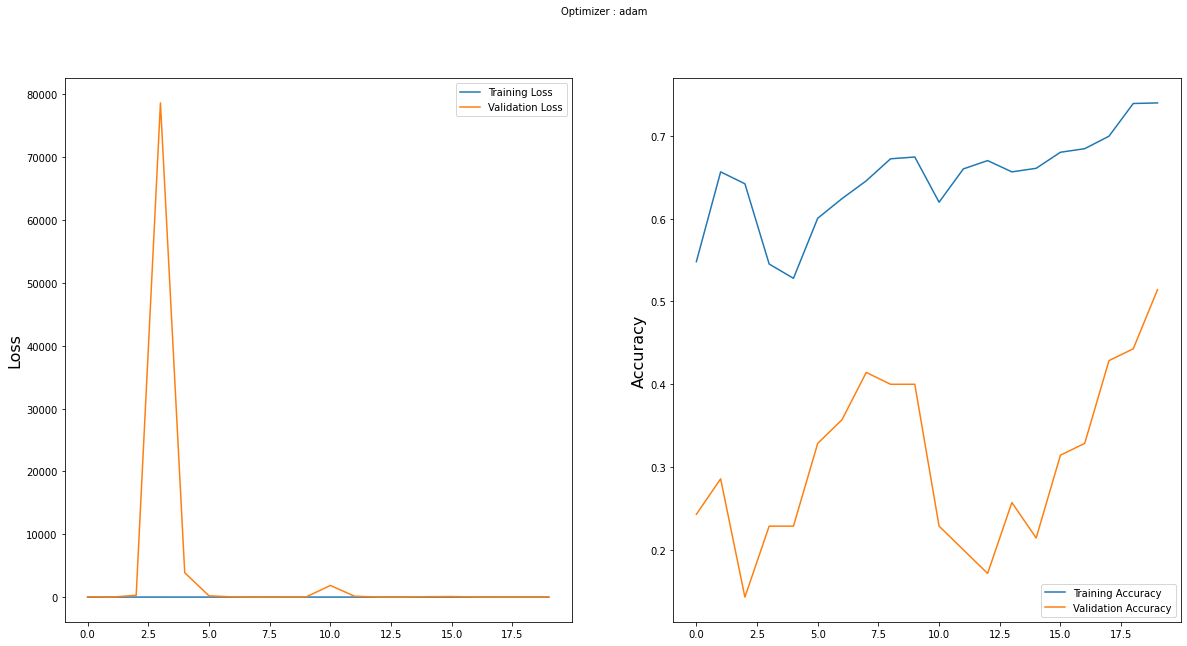

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Xception

In [18]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

# Defining batch and epoch sizes
batch_size = 100
epochs = 20

# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(8, activation='softmax')(x)
# Combining base and head 
model3 = Model(inputs=base.input, outputs=head)

# Compiling the model
model3.compile(optimizer=Adam(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

# Fitting the model with train and validation augmented datasets.
history = model3.fit(train_set,
                              epochs = 20,
                              validation_data = train_set)

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
15/15 [==============================] - 167s 10s/step - loss: 1.9751 - accuracy: 0.2645 - val_loss: 1.8718 - val_accuracy: 0.2473
Epoch 2/20
15/15 [==============================] - 156s 11s/step - loss: 1.4528 - accuracy: 0.6581 - val_loss: 1.5703 - val_accuracy: 0.4043
Epoch 3/20
15/15 [==============================] - 165s 11s/step - loss: 0.9951 - accuracy: 0.8022 - val_loss: 1.1842 - val_accuracy: 0.6065
Epoch 4/20
15/15 [==============================] - 165s 11s/step - loss: 0.6454 - accuracy: 0.8667 - val_loss: 0.8870 - val_accuracy: 0.7097
Epoch 5/20
15/15 [==============================] - 161s 11s/step - loss: 0.4266 - accuracy: 0.9183 - val_loss: 0.5776 - val_accuracy: 0.8043
Epoch 6/20
15/15 [==============================] - 164s 11s/step - loss: 0.2726 - accuracy: 0.9570 - val_loss: 0.3711 - val_accuracy: 0.8817
Epoch 7/20
15/15 [==============================] - 156s 10s/step - loss: 0.2047 - accuracy: 0.9699 - val_loss: 0.2155 - val_accuracy: 0.9419
Epoch 

In [19]:
model3.save('xce.h5')

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


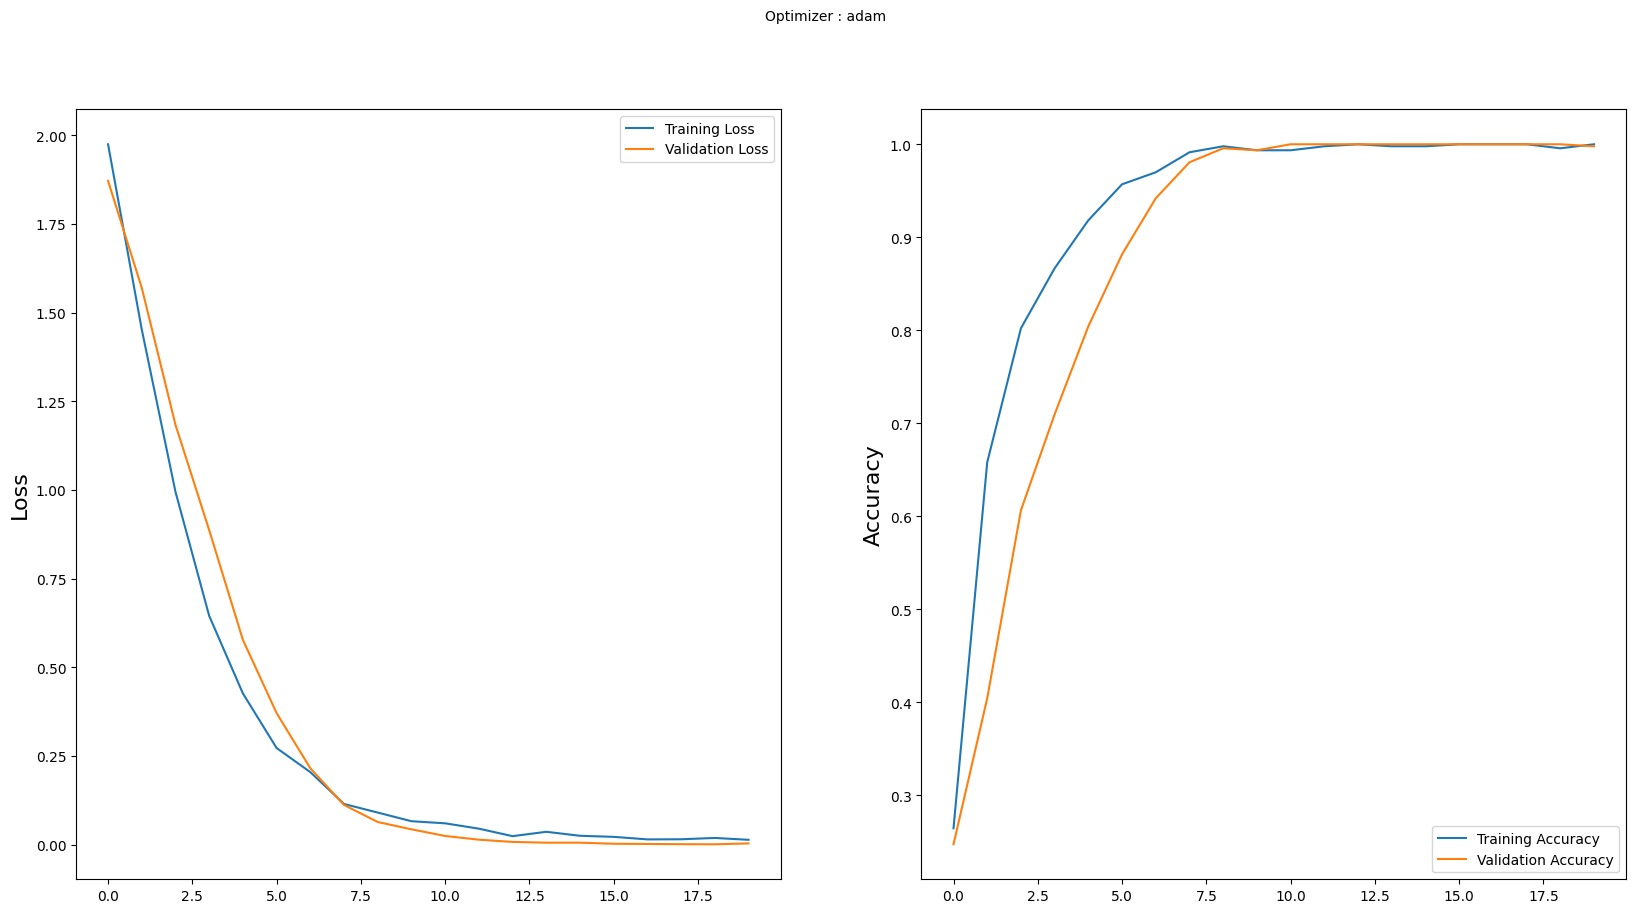

In [20]:
import matplotlib.pyplot as plt

x=history
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# EfficientNet

In [ ]:
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_acc',factor=.01,patience=3,min_lr=1e-5)
from keras_efficientnets import EfficientNetB4
base_model = EfficientNetB4(include_top=False, weights="imagenet", input_shape=(128,128,3),classes=6)

71720960/71719528 [==============================] - 15s 0us/step


In [ ]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(8,activation=('softmax'))) 

#Checking the final model summary
model.summary()

batch_size= 100
epochs=2
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_11 (Functional)   (None, 4, 4, 1792)        17673816  
_________________________________________________________________
flatten_3 (Flatten)          (None, 28672)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              29361152  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 7

In [ ]:
history = model.fit(train_set,
                              epochs = 2,
                              validation_data = test_set)

Epoch 1/2
44/44 [==============================] - 359s 8s/step - loss: 1.4969 - accuracy: 0.4109 - val_loss: 2.1683 - val_accuracy: 0.2857
Epoch 2/2
44/44 [==============================] - 355s 8s/step - loss: 1.1041 - accuracy: 0.6027 - val_loss: 2.0792 - val_accuracy: 0.2429


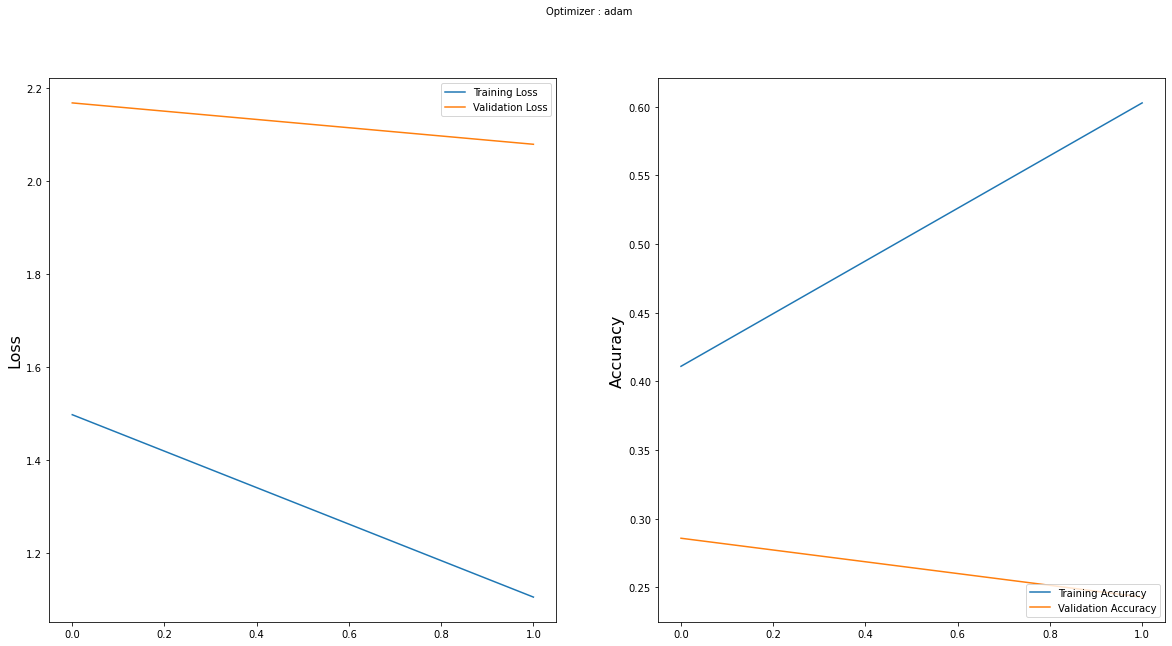

In [ ]:
import matplotlib.pyplot as plt

x=history
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()